In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
games = pd.read_csv('vgsales.csv')

In [ ]:
# Verify data was pulled in successfully.
games

In [ ]:
# Check datatypes for the columns.
games.info()

In [ ]:
games.Year.isnull().sum()

## Takeaways
* The 'Year' column has missing values, so I will have to drop the missing values before converting to and integer datatype.
* I will also drop missing values from all other columns as well.

In [ ]:
# Drop missing values.
games.dropna(inplace=True)

In [ ]:
games.info()

In [ ]:
# Convert 'Year' column into integer datatype.
games.Year = games.Year.astype(int)

In [ ]:
# Verify change.
games.info()

In [ ]:
# Lowercase all columns.
columns = [col.lower() for col in games.columns]
games.columns = columns

In [ ]:
# Drop all observations where global sales are less than one million.
games = games[games.global_sales > 1.0]

In [ ]:
# Create a dataframe for the games that sold less than a million copies globally.
low_sales = games[games.global_sales < 1.0]

In [ ]:
# Take a peek at the different platforms that produced a game/games that sold over one million globally.
games.platform.value_counts()

In [ ]:
games

# Takeaways
* I have the dataframe in a state where I am ready to begin Exploratory Data Analysis.
* My target variable will be 'na_sales'.
* I will have to drop 'global_sales' to prevent data leakage.

In [2]:
# Create a function that will acquire the data and prepare it for Exploratory Data Analysis
def acquire_and_prep():
    games = pd.read_csv('vgsales.csv')
    # Drop missing values.
    games.dropna(inplace=True)
    # Convert 'Year' column into integer datatype.
    games.Year = games.Year.astype(int)
    # Lowercase all columns.
    columns = [col.lower() for col in games.columns]
    games.columns = columns
    # Drop all observations where global sales are less than one million.
    games = games[games.global_sales > 1.0]
    return games

In [3]:
games = acquire_and_prep()

In [4]:
games

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
2049,2051,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00,1.01
2050,2052,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07,1.01
2051,2053,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18,1.01
2052,2054,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.01


In [5]:
# Drop the 'global_sales' and 'rank' columns to prevent possible data leakage.
games.drop(columns=['global_sales', 'rank'], inplace=True)

In [6]:
# Verify the change.
games

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...,...
2049,Oshare Majo Love and Berry: DS Collection,DS,2006,Misc,Sega,0.00,0.00,1.01,0.00
2050,Monster Rancher,PS,1997,Simulation,Tecmo Koei,0.12,0.08,0.74,0.07
2051,The LEGO Movie Videogame,PS3,2014,Action,Warner Bros. Interactive Entertainment,0.33,0.48,0.02,0.18
2052,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20


# Visualize Distributions

In [7]:
games.dtypes

name            object
platform        object
year             int64
genre           object
publisher       object
na_sales       float64
eu_sales       float64
jp_sales       float64
other_sales    float64
dtype: object

In [10]:
# Create two separate dataframes. One for quantitative values and the other for qualitative values.
quantitative_values = games.select_dtypes(exclude='object').columns
qualitative_values = games.select_dtypes(include='object').columns

In [12]:
quantitative_values

Index(['year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')

In [13]:
qualitative_values

Index(['name', 'platform', 'genre', 'publisher'], dtype='object')

### Loop through the quantitative values and show the distribution of each on a separate subplot.

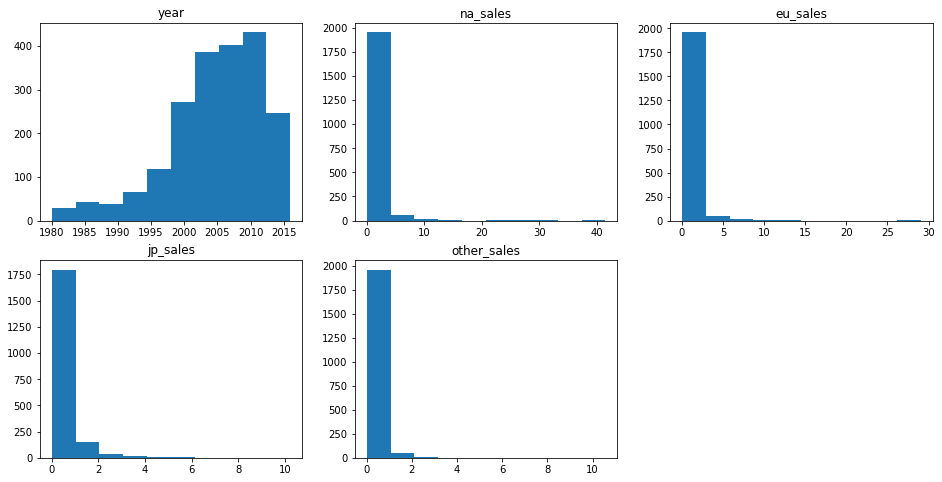

In [20]:
plt.figure(figsize=(16,8))

for i, col in enumerate(quantitative_values):
    plot_number = i + 1
    plt.subplot(2,3,plot_number)
    plt.title(col)
    games[col].hist()
    plt.grid(False)